In [206]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [207]:
df = pd.read_csv("data/train.csv")

In [208]:
df.head()

,date_time,is_holiday,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,air_pollution_index,traffic_volume
0,2012-10-02 09:00:00,None,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,121,5545
1,2012-10-02 10:00:00,None,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,178,4516
2,2012-10-02 11:00:00,None,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,113,4767
3,2012-10-02 12:00:00,None,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,20,5026
4,2012-10-02 13:00:00,None,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,281,4918


In [209]:
df.shape

(33750, 14)

In [210]:
# Check missing values
df.isnull().sum()

date_time              0
is_holiday             0
humidity               0
wind_speed             0
wind_direction         0
visibility_in_miles    0
dew_point              0
temperature            0
rain_p_h               0
snow_p_h               0
clouds_all             0
weather_type           0
air_pollution_index    0
traffic_volume         0
dtype: int64

In [211]:
# Check duplicate values
df.duplicated().sum()

0

In [212]:
# Check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33750 entries, 0 to 33749
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date_time            33750 non-null  object 
 1   is_holiday           33750 non-null  object 
 2   humidity             33750 non-null  int64  
 3   wind_speed           33750 non-null  int64  
 4   wind_direction       33750 non-null  int64  
 5   visibility_in_miles  33750 non-null  int64  
 6   dew_point            33750 non-null  int64  
 7   temperature          33750 non-null  float64
 8   rain_p_h             33750 non-null  float64
 9   snow_p_h             33750 non-null  float64
 10  clouds_all           33750 non-null  int64  
 11  weather_type         33750 non-null  object 
 12  air_pollution_index  33750 non-null  int64  
 13  traffic_volume       33750 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 3.6+ MB


In [213]:
# Check unique values in each column
df.nunique()

date_time              28589
is_holiday                12
humidity                  88
wind_speed                17
wind_direction           361
visibility_in_miles        9
dew_point                  9
temperature             5611
rain_p_h                 353
snow_p_h                  12
clouds_all                60
weather_type              11
air_pollution_index      290
traffic_volume          6462
dtype: int64

In [214]:
categorical_col = [col for col in df.columns if df[col].dtype == "O"]
categorical_col

['date_time', 'is_holiday', 'weather_type']

In [215]:
numerical_col = [col for col in df.columns if df[col].dtype != "O"]
numerical_col

['humidity',
 'wind_speed',
 'wind_direction',
 'visibility_in_miles',
 'dew_point',
 'temperature',
 'rain_p_h',
 'snow_p_h',
 'clouds_all',
 'air_pollution_index',
 'traffic_volume']

# Categorical columns

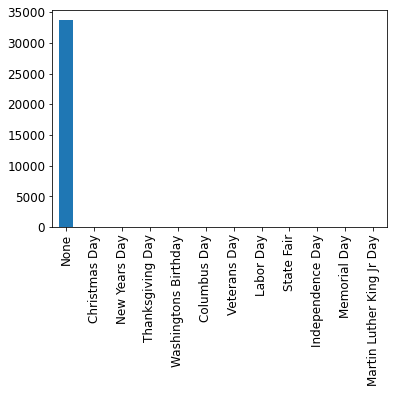

In [216]:
# categories of "is_holiday" column
df['is_holiday'].value_counts().plot(kind='bar')
plt.show()

In [217]:
# Percentage of None values in "is_holiday" column 
(df['is_holiday'].value_counts()['None']/df.shape[0])*100

99.8725925925926

In [218]:
df['weather_type'].value_counts()

Clouds          11213
Clear            9233
Mist             4047
Rain             3940
Snow             2070
Drizzle          1204
Haze              902
Fog               567
Thunderstorm      553
Smoke              17
Squall              4
Name: weather_type, dtype: int64

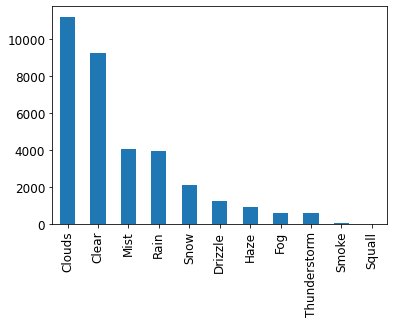

In [219]:
df['weather_type'].value_counts().plot.bar()
plt.show()

# Numerical columns

In [220]:
numerical_col.remove('air_pollution_index')

In [221]:
numerical_col

['humidity',
 'wind_speed',
 'wind_direction',
 'visibility_in_miles',
 'dew_point',
 'temperature',
 'rain_p_h',
 'snow_p_h',
 'clouds_all',
 'traffic_volume']

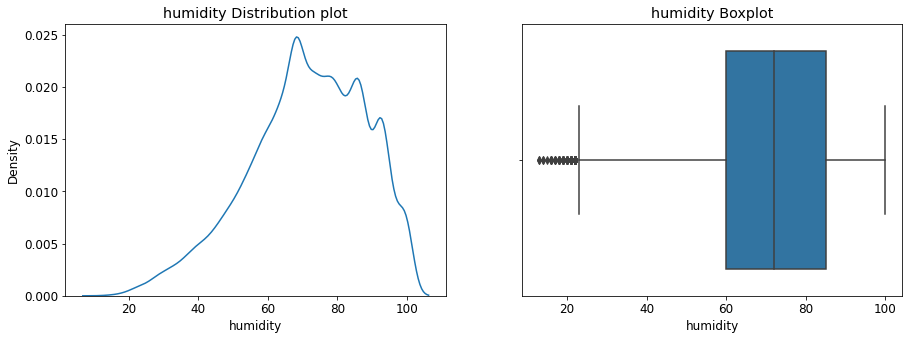

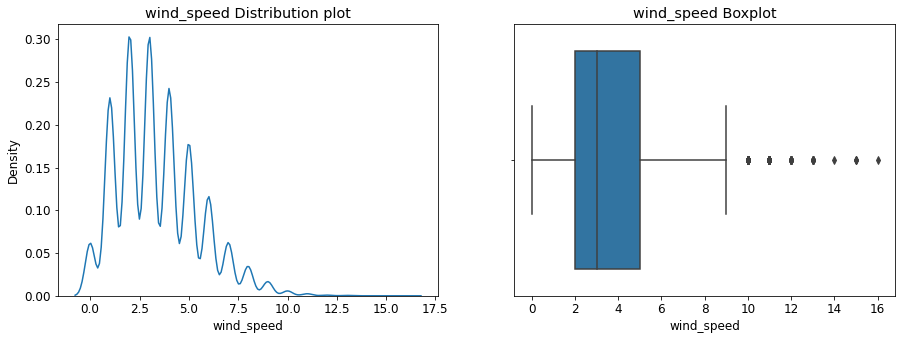

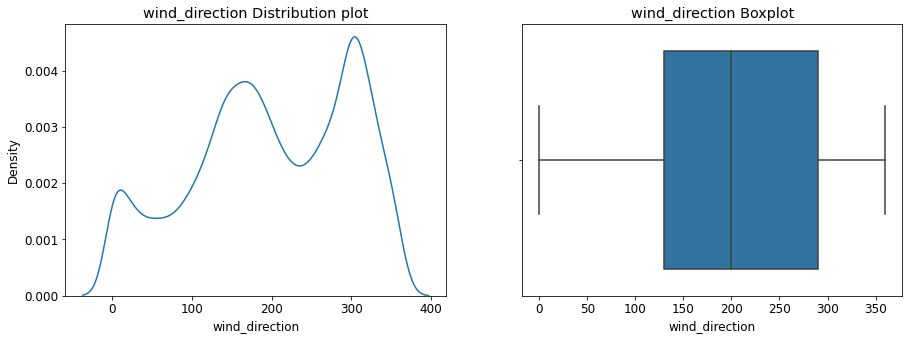

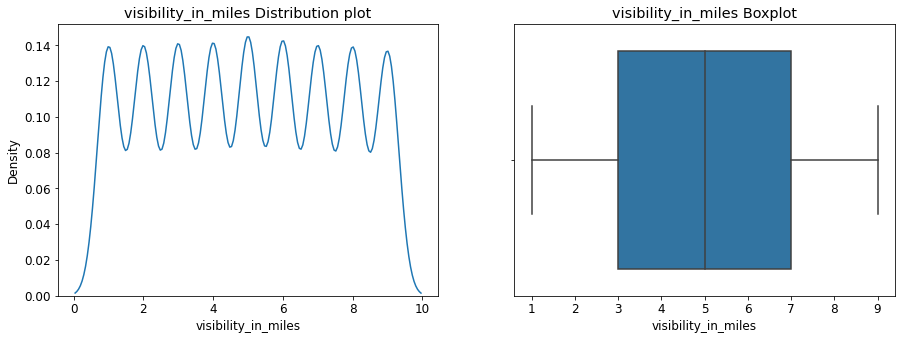

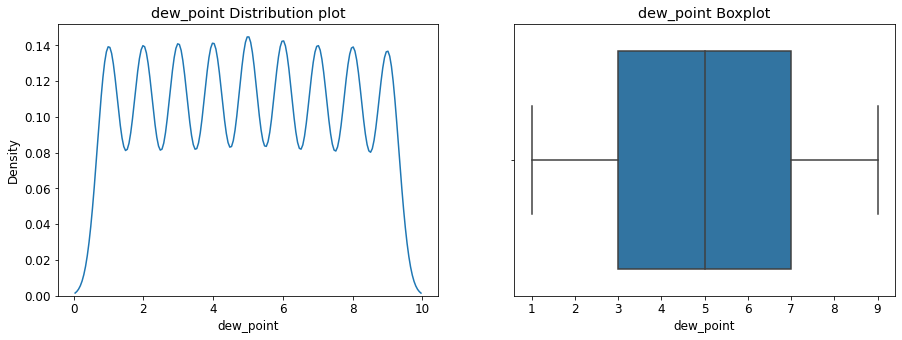

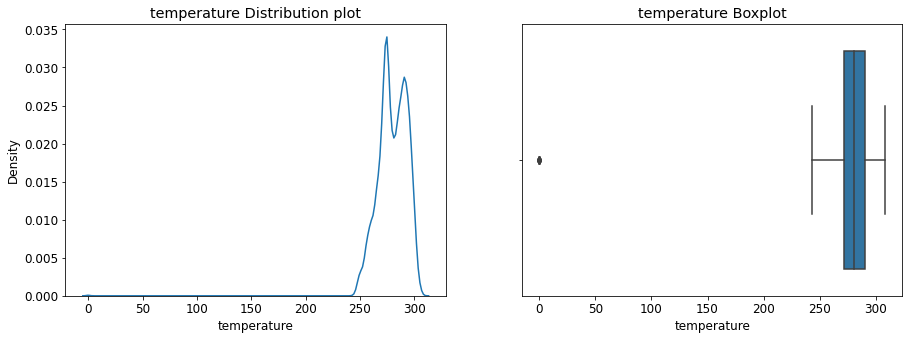

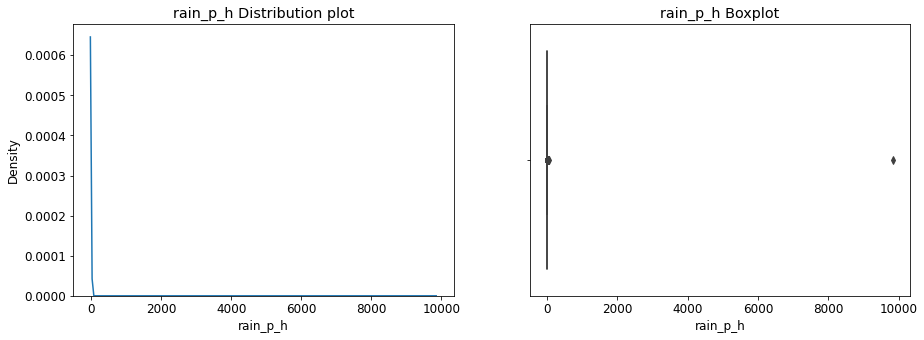

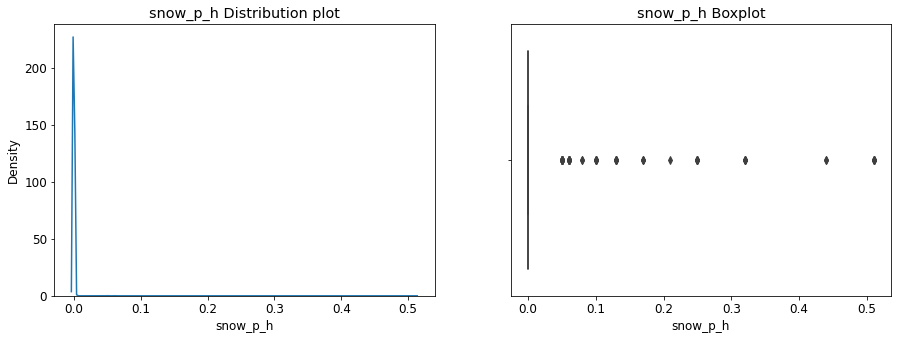

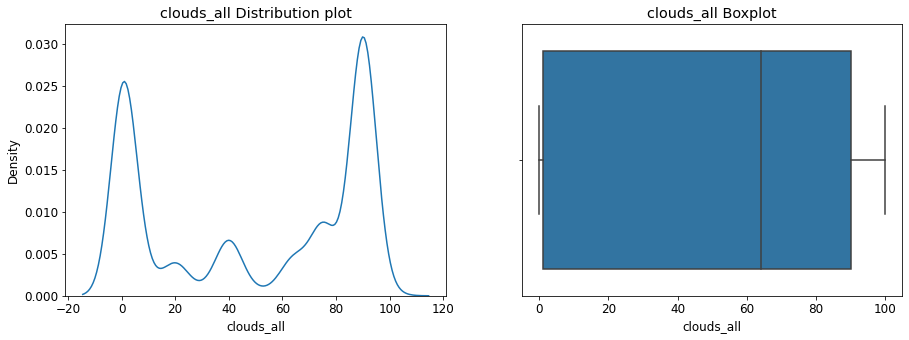

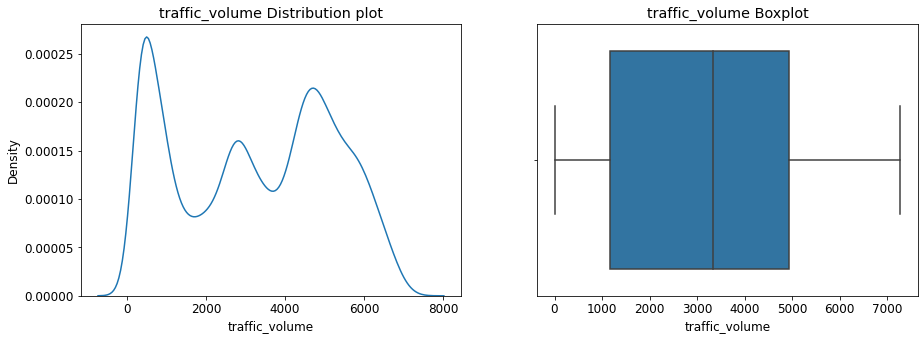

In [222]:
for col in numerical_col:
    
    fig = plt.figure(figsize=(15,5))
    
    plt.subplot(1, 2, 1)
    # df['humidity'].hist(grid=False)
    sns.distplot(df[col], hist=False)
    plt.title(col+" Distribution plot")

    plt.subplot(1, 2, 2)
    sns.boxplot(df[col])
    plt.title(col+" Boxplot")

    plt.show()

In [223]:
# Detecting outliers in "humidity" column by z_score method as it close to normal distribution

def detect_outliers_by_z_score(data):
    outliers = []
    threshold = 3
    std_val  = data.std()
    mean_val = data.mean()

    for value in data:
        z_score = (value-mean_val)/std_val
        if abs(z_score) > 3:
            outliers.append(value)
    return outliers

In [224]:
out = detect_outliers_by_z_score(df['humidity'])
print("Total outliers by z_score: ",len(out))

Total outliers by z_score:  47


In [225]:
df['humidity'].describe()

count    33750.000000
mean        71.209007
std         16.852248
min         13.000000
25%         60.000000
50%         72.000000
75%         85.000000
max        100.000000
Name: humidity, dtype: float64

In [226]:
# Capping "humidity" column outliers by upper_limit and lower_limit
upper_limit = df['humidity'].mean() + (3*df['humidity'].std())
lower_limit = df['humidity'].mean() - (3*df['humidity'].std())
print("Upper limit: ", upper_limit)
print("Lower limit: ", lower_limit)

df['humidity'] = np.where( df['humidity']>upper_limit, upper_limit, np.where( df['humidity']<lower_limit, lower_limit, df['humidity'] ) )

Upper limit:  121.76575218663382
Lower limit:  20.652262628181006


In [227]:
df.shape

(33750, 14)

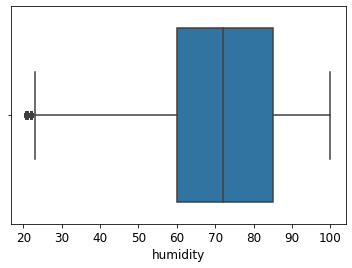

In [228]:
# Outliers in humidity after Capping them
sns.boxplot(df['humidity'])
plt.show()

In [229]:
df['wind_speed'].describe()

count    33750.000000
mean         3.378193
std          2.055792
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         16.000000
Name: wind_speed, dtype: float64

In [230]:
# Detecting outliers in "wind_speed" column by IQR method as it is not normally distributed

def outliers_by_iqr(data):
    outliers = []
    
    percentile_25 = np.quantile(data, 0.25)
    percentile_75 = np.quantile(data, 0.75)
    IQR           = percentile_75 - percentile_25
    upper_limit   = percentile_75 + (1.5 * IQR)
    lower_limit   = percentile_25 - (1.5 * IQR)
    print("Upper Limit: ", upper_limit)
    print("Lower Limit: ", lower_limit)
    
    for item in data:
        if (item > upper_limit) or (item < lower_limit):
            outliers.append(item)
            
    return outliers, upper_limit, lower_limit

In [231]:
outlier_data, iqr_upper_limit, iqr_lower_limit = outliers_by_iqr(df['wind_speed'])
print("Outliers data length: ", len(outlier_data) )

Upper Limit:  9.5
Lower Limit:  -2.5
Outliers data length:  207


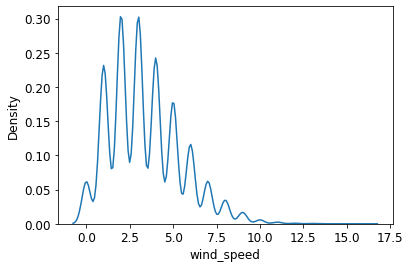

In [232]:
temp_wind_speed = df['wind_speed']
sns.distplot(temp_wind_speed, hist=False)
plt.show()

In [233]:
# Capping outliers of "wind_speed" column
df['wind_speed'] = np.where( (df['wind_speed']>iqr_upper_limit), iqr_upper_limit, np.where(df['wind_speed']<iqr_lower_limit, iqr_lower_limit, df['wind_speed']))

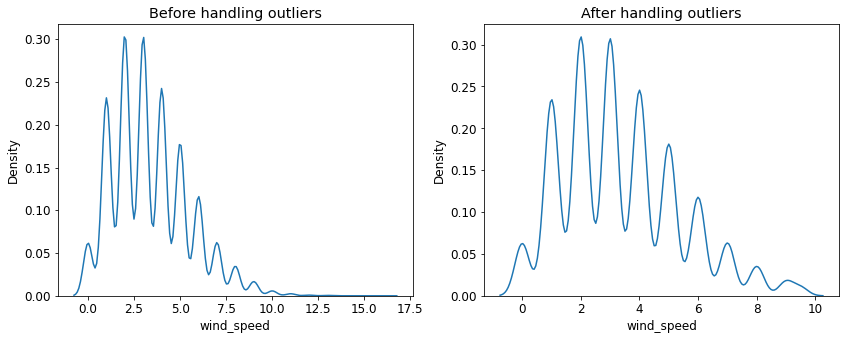

In [234]:
# Comparing "wind_speed" data distribution before and after capping outliers 
fig = plt.figure(figsize=(14,5))
ax1 = fig.add_subplot(1,2,1)
sns.distplot(temp_wind_speed, hist=False, ax=ax1)
plt.title("Before handling outliers")

ax2 = fig.add_subplot(1,2,2)
sns.distplot(df['wind_speed'], ax=ax2, hist=False)
plt.title("After handling outliers")
plt.show()

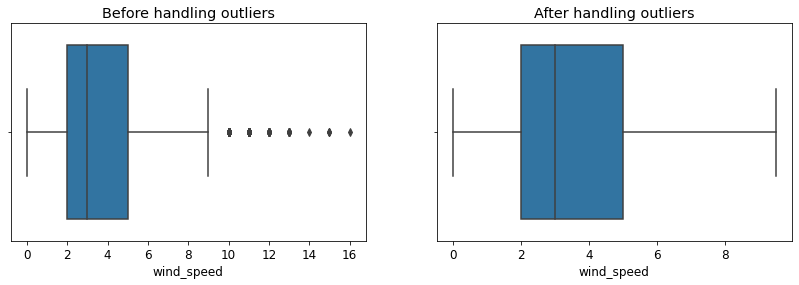

In [235]:
# Comparing "wind_speed" boxplot before and after capping outliers 
fig = plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.boxplot(temp_wind_speed)
plt.title("Before handling outliers")

plt.subplot(1,2,2)
sns.boxplot(df['wind_speed'])
plt.title("After handling outliers")
plt.show()

In [236]:
# Detecting outliers in "temperature" column by IQR method as it is not normally distributed
outlier_data, iqr_upper_limit, iqr_lower_limit = outliers_by_iqr(df['temperature'])
print("Outliers data length: ", len(outlier_data) )

Upper Limit:  318.96999999999997
Lower Limit:  243.37000000000006
Outliers data length:  10


In [237]:
temp_temperature = df['temperature']

In [238]:
df['temperature'].describe()

count    33750.000000
mean       280.069587
std         13.415256
min          0.000000
25%        271.720000
50%        280.150000
75%        290.620000
max        308.240000
Name: temperature, dtype: float64

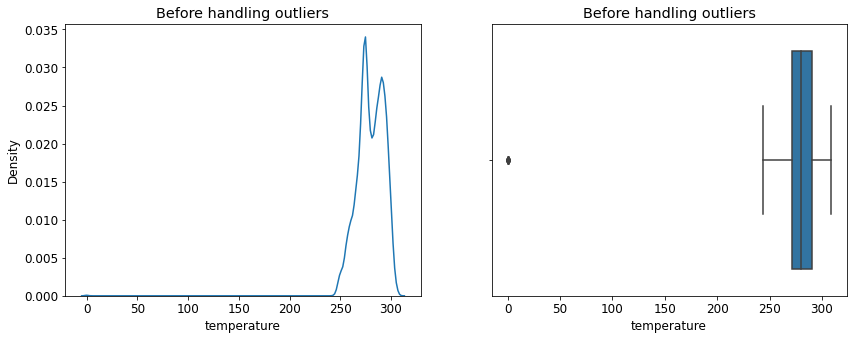

In [239]:
fig = plt.figure(figsize=(14,5))
ax1 = fig.add_subplot(1,2,1)
sns.distplot(df['temperature'], ax=ax1, hist=False)
plt.title("Before handling outliers")

ax2 = fig.add_subplot(1,2,2)
sns.boxplot(df['temperature'], ax=ax2)
plt.title("Before handling outliers")
plt.show()

In [240]:
# Capping outliers of "temperature" column
df['temperature'] = np.where( (df['temperature']>iqr_upper_limit), iqr_upper_limit, np.where(df['temperature']<iqr_lower_limit, iqr_lower_limit, df['temperature']))

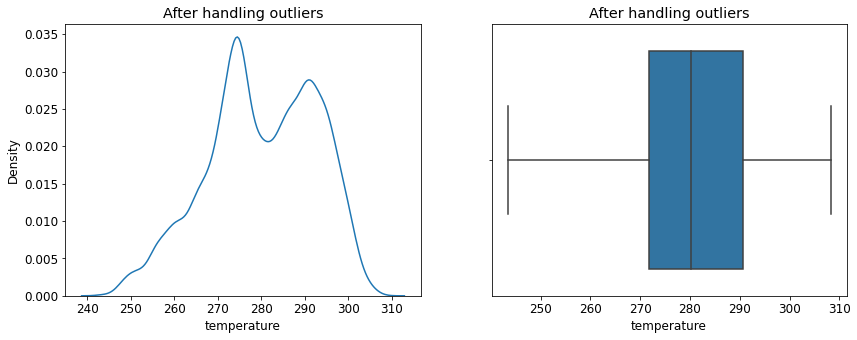

In [241]:
# Comparing "temperature" data distribution before and after capping outliers 
fig = plt.figure(figsize=(14,5))
ax1 = fig.add_subplot(1,2,1)
sns.distplot(df['temperature'], ax=ax1, hist=False)
plt.title("After handling outliers")

ax2 = fig.add_subplot(1,2,2)
sns.boxplot(df['temperature'], ax=ax2)
plt.title("After handling outliers")
plt.show()

In [242]:
df['temperature'].describe()

count    33750.000000
mean       280.141697
std         12.534796
min        243.370000
25%        271.720000
50%        280.150000
75%        290.620000
max        308.240000
Name: temperature, dtype: float64

In [243]:
# Handling and detecting outliers of 'rain_p_h'
df['rain_p_h'].value_counts()

0.00    30996
0.25      679
0.51      241
0.30      119
0.76       97
        ...  
2.68        1
0.33        1
3.91        1
1.63        1
0.74        1
Name: rain_p_h, Length: 353, dtype: int64

In [244]:
# Null value percentage in "rain_p_h"
(30996/33750)*100

91.84

In [245]:
# Dropping column "rain_p_h"
df.drop("rain_p_h", axis=1, inplace=True)

In [246]:
df.columns.tolist()

['date_time',
 'is_holiday',
 'humidity',
 'wind_speed',
 'wind_direction',
 'visibility_in_miles',
 'dew_point',
 'temperature',
 'snow_p_h',
 'clouds_all',
 'weather_type',
 'air_pollution_index',
 'traffic_volume']

In [247]:
# Handling "snow_p_h"
outlier_data, iqr_upper_limit, iqr_lower_limit = outliers_by_iqr(df['snow_p_h'])
print("Outliers data length: ", len(outlier_data) )

Upper Limit:  0.0
Lower Limit:  0.0
Outliers data length:  63


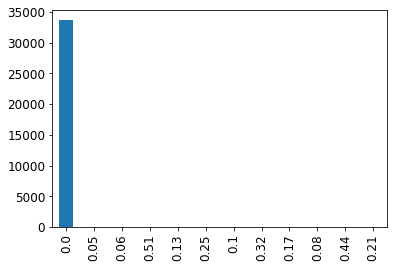

In [248]:
df['snow_p_h'].value_counts().plot(kind='bar')
plt.show()

In [249]:
# Null value percentage in snow_p_h
33687/df.shape[0]

0.9981333333333333

In [250]:
# Dropping "snow_p_h" column
df.drop("snow_p_h", axis=1, inplace=True)

In [251]:
numerical_col = [col for col in df.columns if df[col].dtype != "O"]
numerical_col

['humidity',
 'wind_speed',
 'wind_direction',
 'visibility_in_miles',
 'dew_point',
 'temperature',
 'clouds_all',
 'air_pollution_index',
 'traffic_volume']

In [252]:
numerical_col.remove('air_pollution_index')

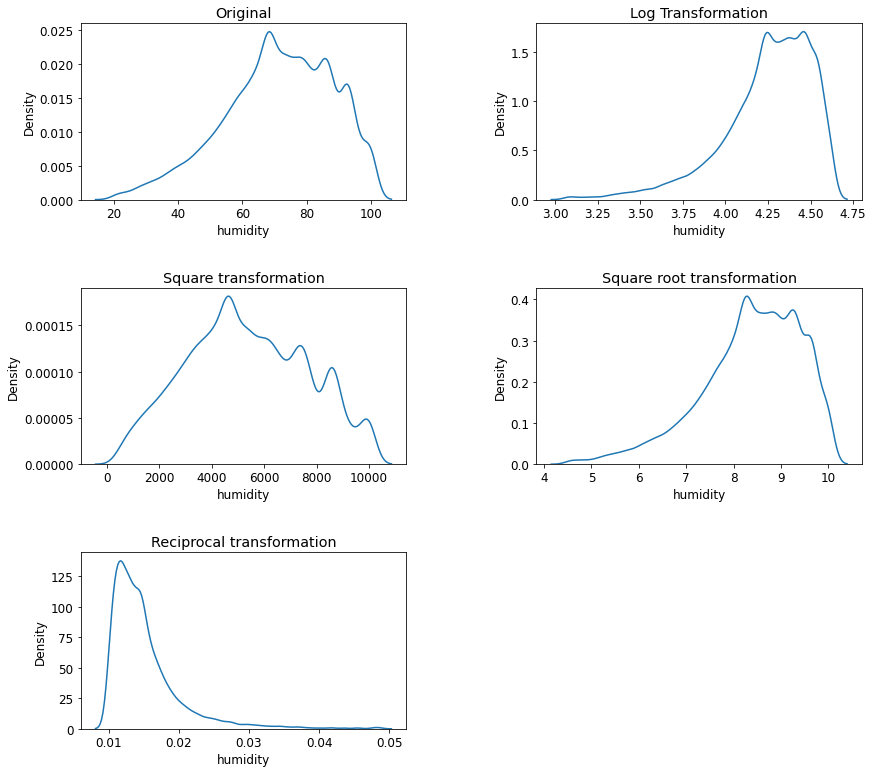

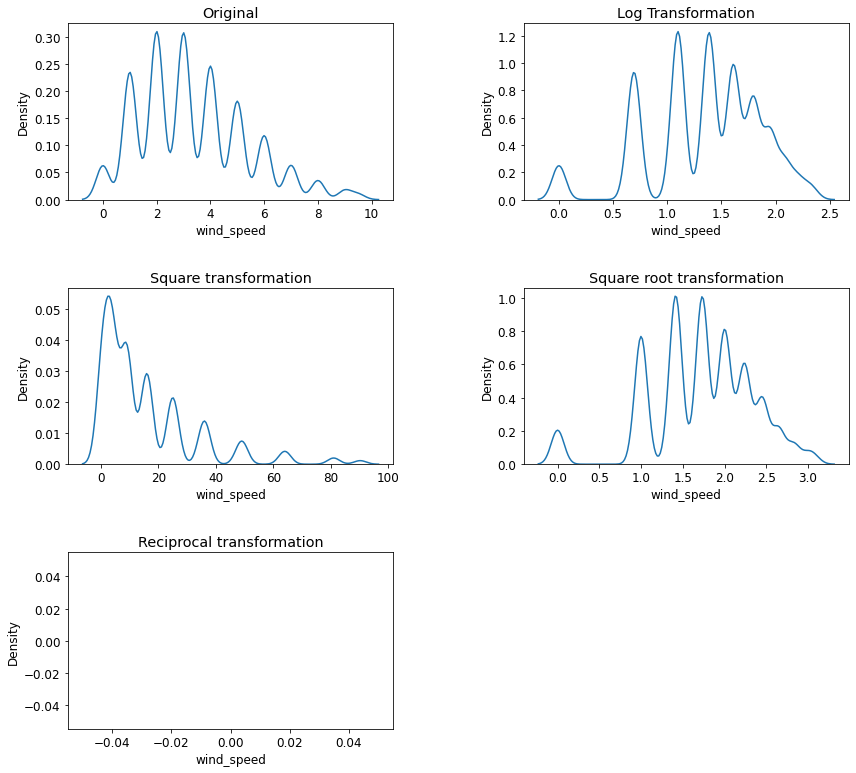

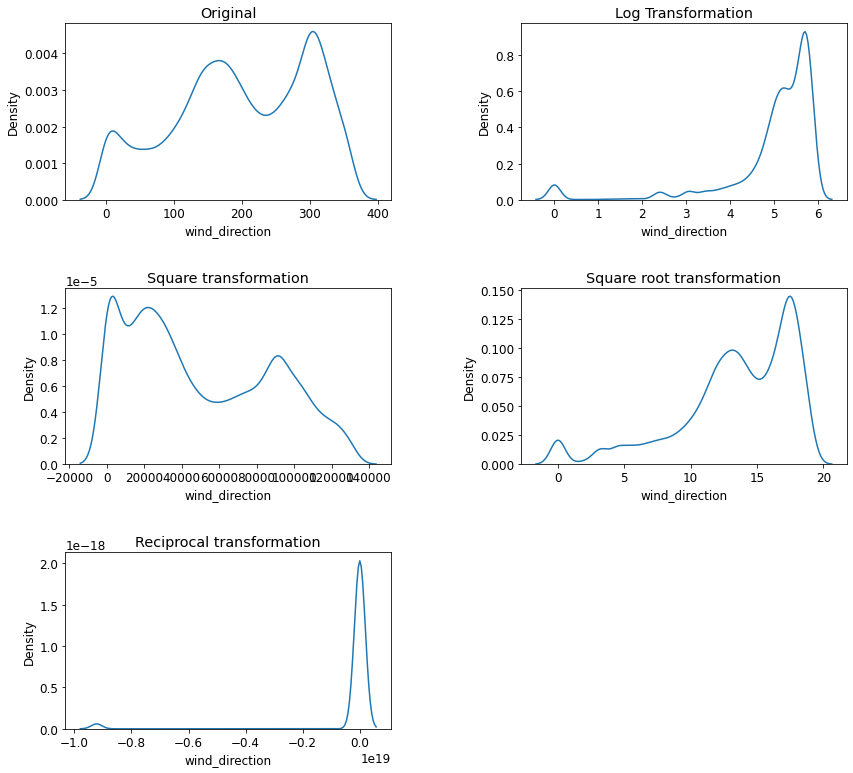

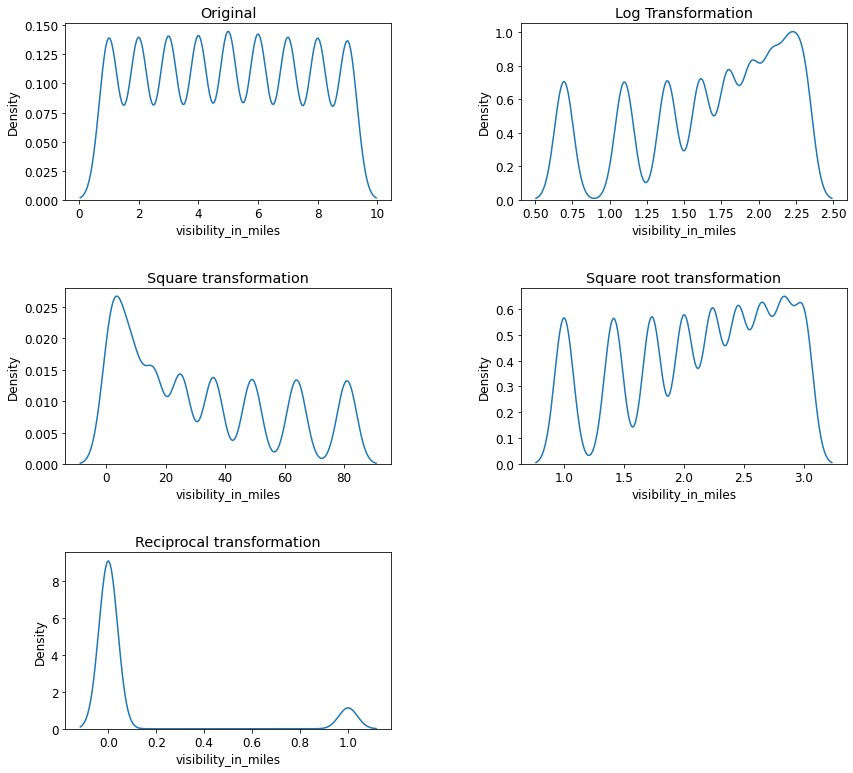

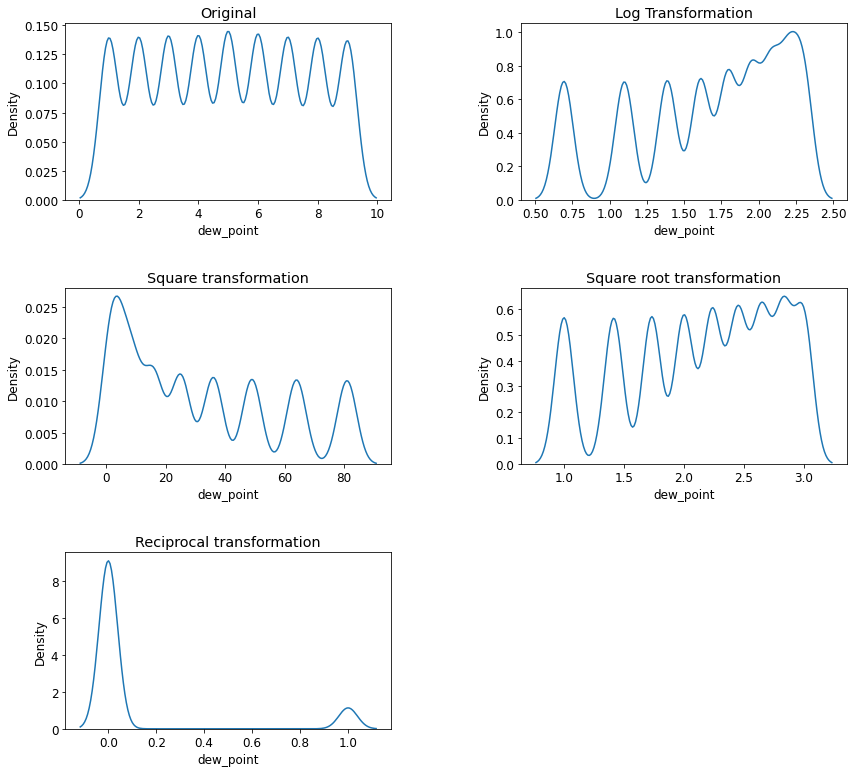

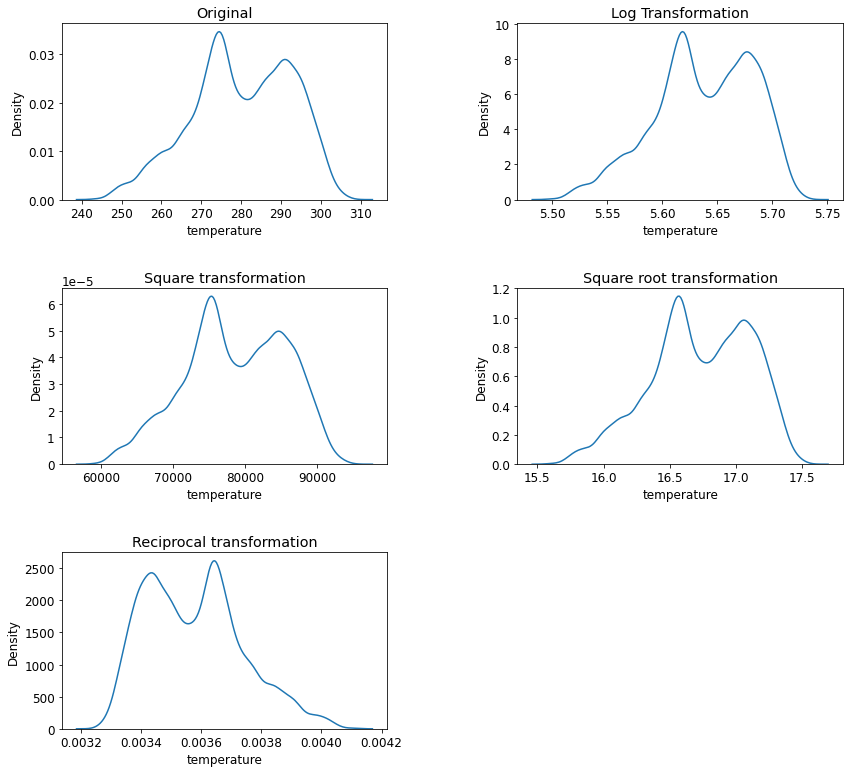

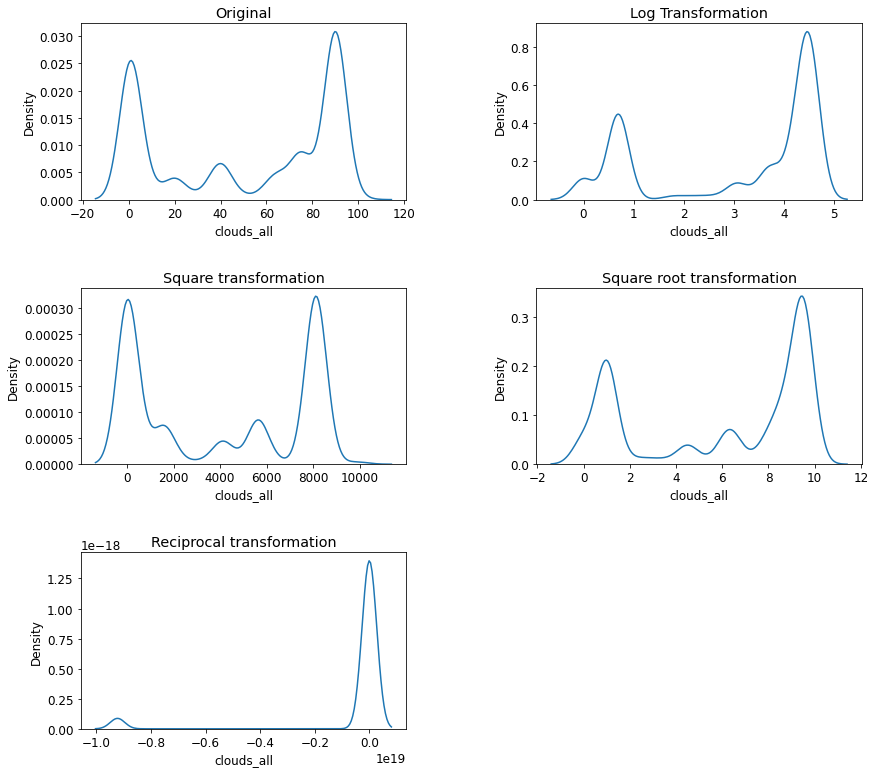

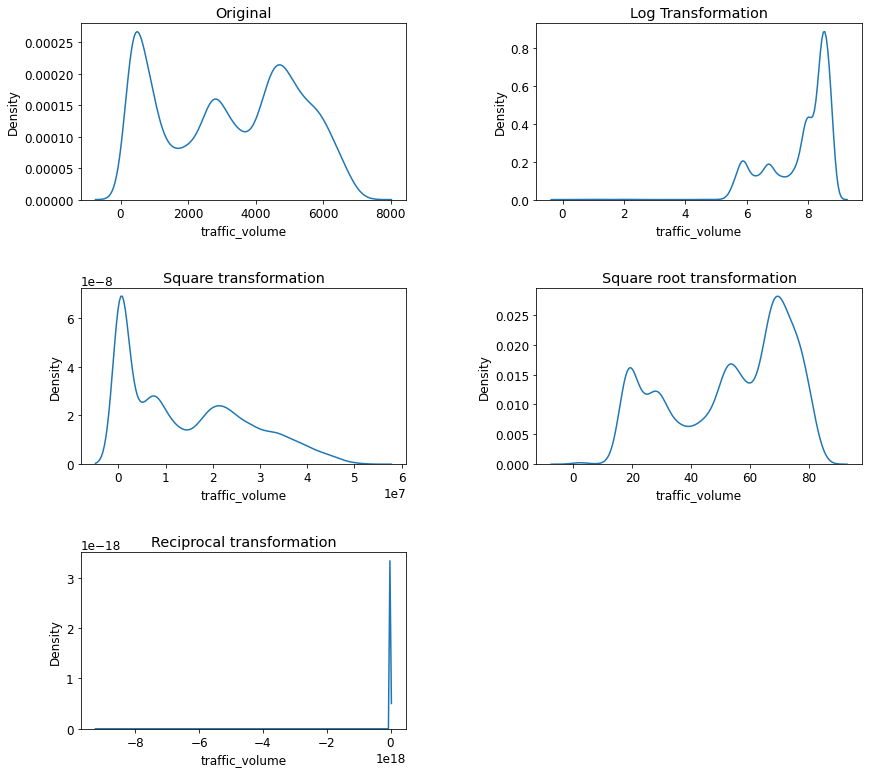

In [253]:
# Applying Function transformation to numerical columns

from sklearn.preprocessing import FunctionTransformer
log_trans = FunctionTransformer(np.log1p)

X = df[numerical_col]
# y = df['air_pollution_index']
X_transformed = log_trans.fit_transform(X)

for col in numerical_col:
    fig = plt.figure(figsize=(14,10), )
    plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.4)
    plt.subplot(321)
    sns.distplot(df[col], hist=False)
    plt.title("Original")
    
    plt.subplot(322)
    sns.distplot(X_transformed[col], hist=False)
    plt.title("Log Transformation")

    plt.subplot(323)
    humidity_sqr = np.square(df[col])
    sns.distplot(humidity_sqr, hist=False)
    plt.title("Square transformation")

    plt.subplot(324)
    humidity_sqrt = np.sqrt(df[col])
    sns.distplot(humidity_sqrt, hist=False)
    plt.title("Square root transformation")

    plt.subplot(325)
    humidity_reciprocal = np.reciprocal(df[col])
    sns.distplot(humidity_reciprocal, hist=False)
    plt.title("Reciprocal transformation")

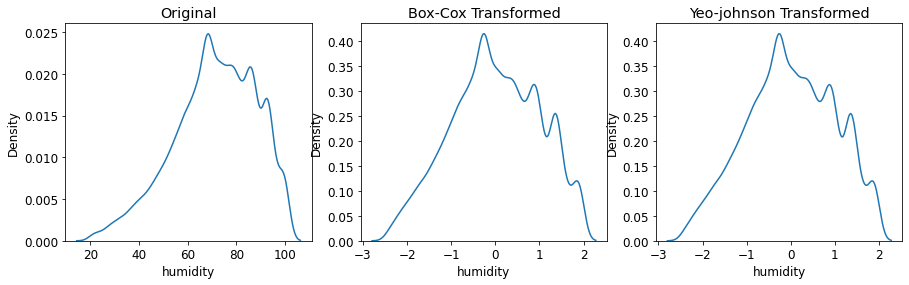

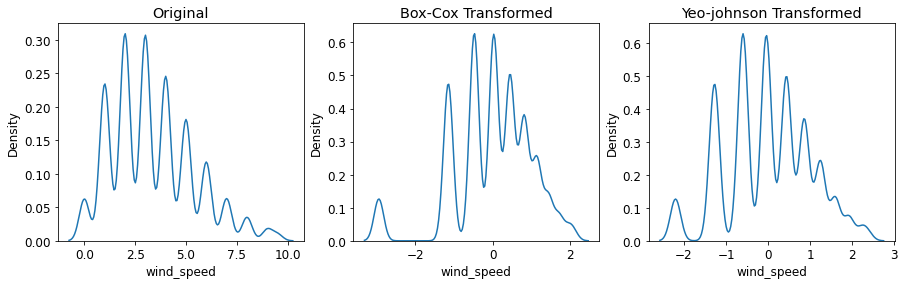

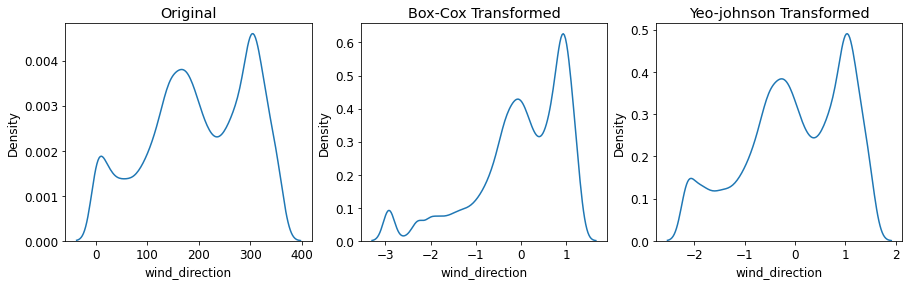

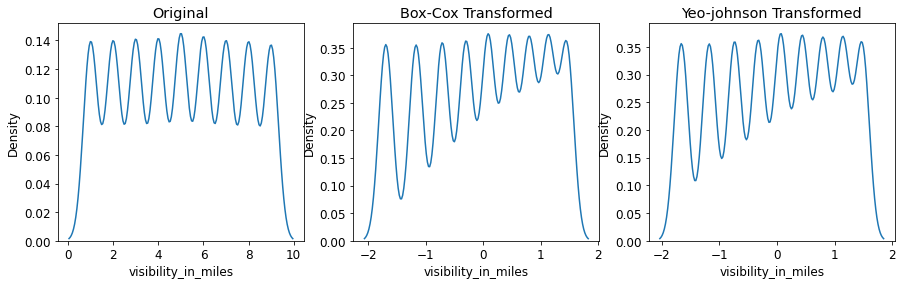

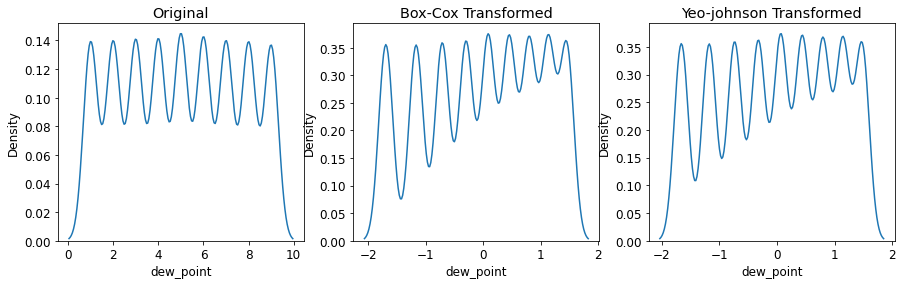

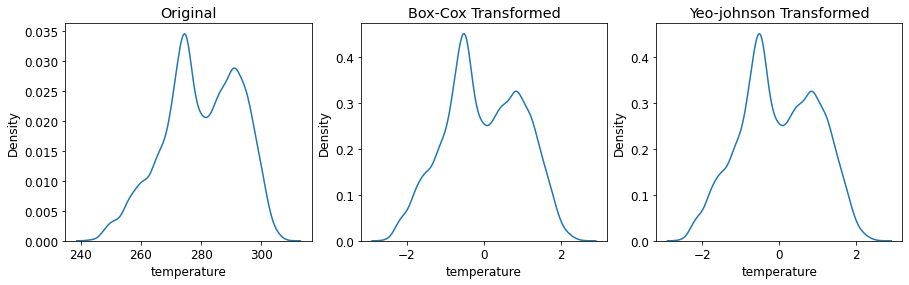

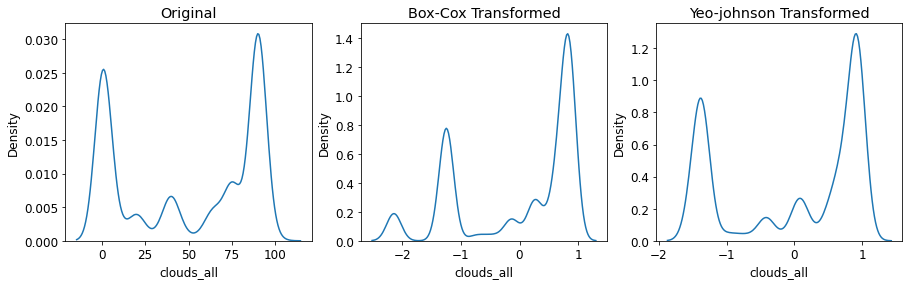

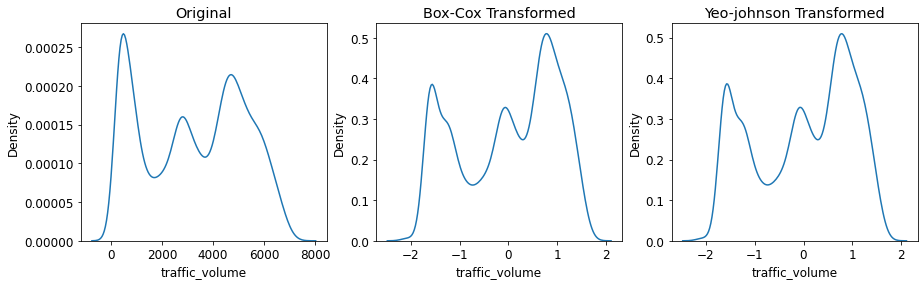

In [254]:
# Applying Power Trsansformer 
from sklearn.preprocessing import PowerTransformer

# Apply box-cox 
box_cox = PowerTransformer(method='box-cox')
X_box_cox_transformed    = box_cox.fit_transform(X+0.0000001)
X_box_cox_transformed_df = pd.DataFrame(X_box_cox_transformed, columns=X.columns)

# Apply Yeo-johnson (default method is yeo-johnson)
yeo_johnson  = PowerTransformer()
X_yeo_johnson_transformed    = yeo_johnson.fit_transform(X)
X_yeo_johnson_transformed_df = pd.DataFrame(X_yeo_johnson_transformed, columns=X.columns)


for col in numerical_col:
    
    plt.figure(figsize=(15,4))
#     ax1 = fig.add_subplot(131)
    plt.subplot(1,3,1)
    sns.distplot(df[col], hist=False)
    plt.title("Original")
    
#     ax2 = fig.add_subplot(132)
    plt.subplot(1,3,2)
    sns.distplot(X_box_cox_transformed_df[col], hist=False)
    plt.title("Box-Cox Transformed")
    
    plt.subplot(1,3,3)
    sns.distplot(X_yeo_johnson_transformed_df[col], hist=False)
    plt.title("Yeo-johnson Transformed")
    

In [255]:
# Applying square transformation on "humidity" column
df['humidity'] = np.square(df['humidity'])

In [256]:
df.corr()

,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,clouds_all,air_pollution_index,traffic_volume
humidity,1.000000,-0.144996,-0.059335,0.004980,0.004980,0.046754,0.013206,-0.000562,0.014879
wind_speed,-0.144996,1.000000,0.192332,-0.004958,-0.004958,-0.062471,-0.003917,-0.004140,0.016497
wind_direction,-0.059335,0.192332,1.000000,0.000716,0.000716,-0.050819,0.020392,0.000749,0.014278
visibility_in_miles,0.004980,-0.004958,0.000716,1.000000,1.000000,-0.004312,-0.001582,0.003499,0.001348
dew_point,0.004980,-0.004958,0.000716,1.000000,1.000000,-0.004312,-0.001582,0.003499,0.001348
temperature,0.046754,-0.062471,-0.050819,-0.004312,-0.004312,1.000000,-0.137324,0.004066,0.131301
clouds_all,0.013206,-0.003917,0.020392,-0.001582,-0.001582,-0.137324,1.000000,-0.008541,0.037922
air_pollution_index,-0.000562,-0.004140,0.000749,0.003499,0.003499,0.004066,-0.008541,1.000000,-0.003751
traffic_volume,0.014879,0.016497,0.014278,0.001348,0.001348,0.131301,0.037922,-0.003751,1.000000


In [257]:
df.cov()

,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,clouds_all,air_pollution_index,traffic_volume
humidity,5.269941e+06,-675.776537,-13599.419725,29.382411,29.382411,1345.355115,1178.452604,-107.955086,6.802204e+04
wind_speed,-6.757765e+02,4.121831,38.985797,-0.025872,-0.025872,-1.589799,-0.309098,-0.703849,6.669918e+01
wind_direction,-1.359942e+04,38.985797,9968.242815,0.183806,0.183806,-63.599429,79.142103,6.265233,2.838917e+03
visibility_in_miles,2.938241e+01,-0.025872,0.183806,6.605009,6.605009,-0.138908,-0.157998,0.753034,6.900497e+00
dew_point,2.938241e+01,-0.025872,0.183806,6.605009,6.605009,-0.138908,-0.157998,0.753034,6.900497e+00
temperature,1.345355e+03,-1.589799,-63.599429,-0.138908,-0.138908,157.121109,-66.911061,4.267786,3.277652e+03
clouds_all,1.178453e+03,-0.309098,79.142103,-0.157998,-0.157998,-66.911061,1511.011709,-27.799893,2.935628e+03
air_pollution_index,-1.079551e+02,-0.703849,6.265233,0.753034,0.753034,4.267786,-27.799893,7011.636413,-6.255162e+02
traffic_volume,6.802204e+04,66.699181,2838.916687,6.900497,6.900497,3277.652129,2935.627852,-625.516240,3.966022e+06


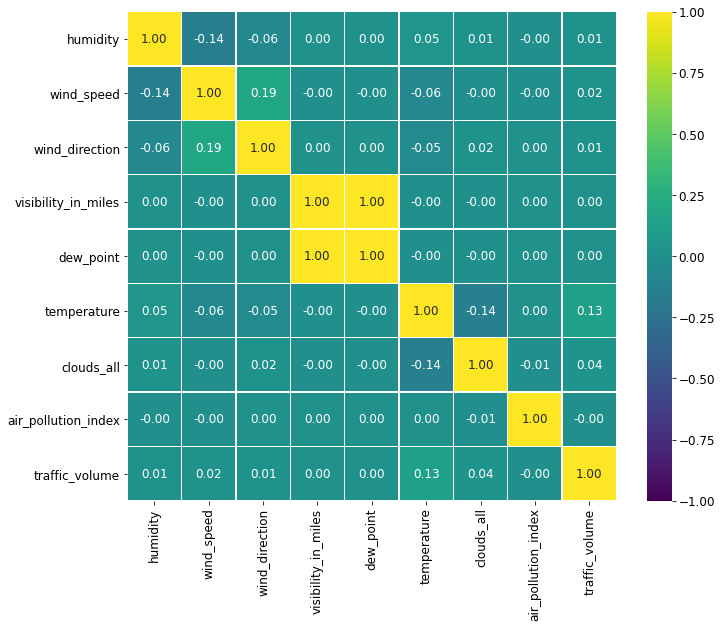

In [258]:
plt.figure(figsize=(11,9))
plt.rcParams.update({'font.size': 12})
sns.heatmap(data=df.corr(), cmap='viridis', vmin=-1, vmax=1, center=0, annot=True, fmt="0.2f", square=True, linewidths=0.4)
plt.show()

In [259]:
# From the above heatmap we can see "visibility_in_miles" and "dew_point" are strongly correlated so we can drop either of them

In [260]:
df.head()

,date_time,is_holiday,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,clouds_all,weather_type,air_pollution_index,traffic_volume
0,2012-10-02 09:00:00,None,7921.0,2.0,329,1,1,288.28,40,Clouds,121,5545
1,2012-10-02 10:00:00,None,4489.0,3.0,330,1,1,289.36,75,Clouds,178,4516
2,2012-10-02 11:00:00,None,4356.0,3.0,329,2,2,289.58,90,Clouds,113,4767
3,2012-10-02 12:00:00,None,4356.0,3.0,329,5,5,290.13,90,Clouds,20,5026
4,2012-10-02 13:00:00,None,4225.0,3.0,329,7,7,291.14,75,Clouds,281,4918


In [261]:
df.shape

(33750, 12)

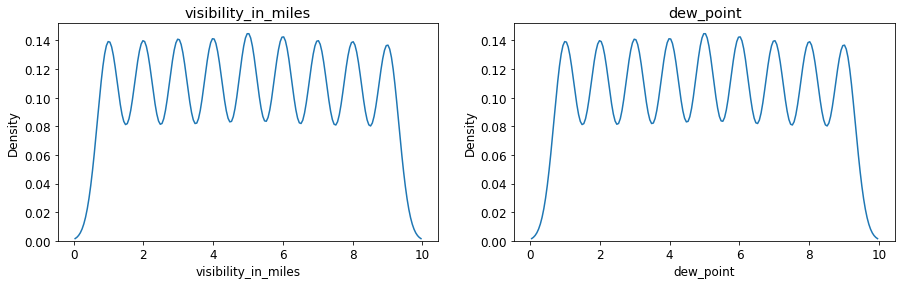

In [276]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.distplot(df['visibility_in_miles'], hist=False)
plt.title("visibility_in_miles")

plt.subplot(1,2,2)
sns.distplot(df['dew_point'], hist=False)
plt.title("dew_point")
plt.show()

In [272]:
df['visibility_in_miles'].value_counts()

5    3863
6    3800
4    3765
3    3755
1    3738
7    3727
2    3725
8    3706
9    3671
Name: visibility_in_miles, dtype: int64

In [273]:
df['dew_point'].value_counts()

5    3863
6    3800
4    3765
3    3755
1    3738
7    3727
2    3725
8    3706
9    3671
Name: dew_point, dtype: int64

In [277]:
# Dropping "dew_point"
df.drop("dew_point", axis=1, inplace=True)